In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rev_m = 170
rev_stdev = 20
iterations = 1000

In [3]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([154.59643099, 150.50134547, 161.36083339, 208.91087694,
       186.50640395, 161.98337446, 168.32665248, 163.96343911,
       189.23485691, 146.15643294, 199.08393022, 170.66914765,
       163.46380823, 184.47878537, 172.35299577, 158.6272202 ,
       198.91446588, 165.51332077, 166.94245439, 183.47630309,
       164.46857531, 183.56013816, 187.95956455, 196.20683463,
       193.50161443, 189.85537595, 175.66211071, 172.71200362,
       193.75660624, 172.40575937, 127.67358769, 183.90725644,
       161.00811216, 184.28128867, 197.55510306, 149.97413807,
       153.26733444, 172.7035511 , 197.21196401, 161.48628862,
       156.87002359, 184.01465323, 191.30148824, 171.88228178,
       150.84181334, 173.44401926, 182.5081879 , 198.55933386,
       169.14592588, 188.45542379, 142.67218964, 175.72488092,
       149.37296516, 149.44768987, 193.77793448, 154.75791909,
       164.44525127, 164.98250315, 186.52894034, 197.99365217,
       174.24377267, 153.05080282, 201.62152359, 139.72

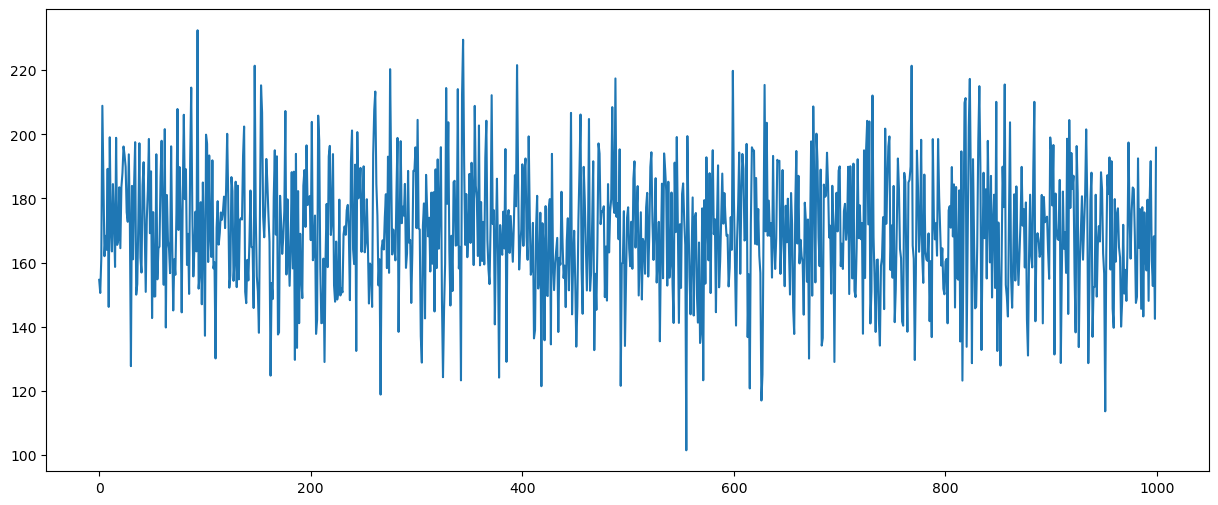

In [4]:
plt.figure(figsize=(15,6))
plt.plot(rev)

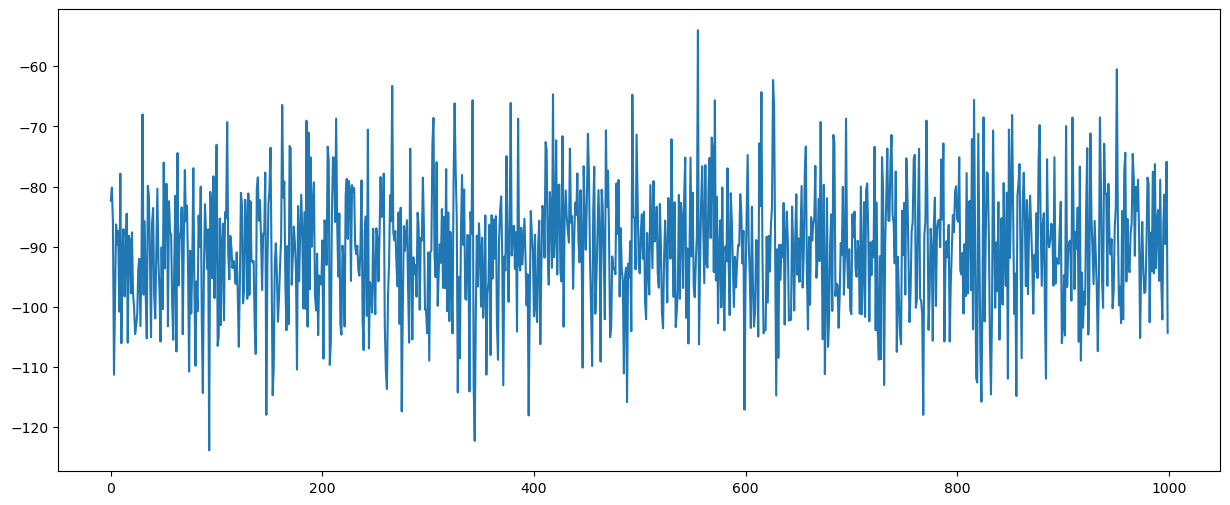

In [12]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)

In [13]:
COGS.mean()

-90.461728642927

In [14]:
COGS.std()

10.471768104948072

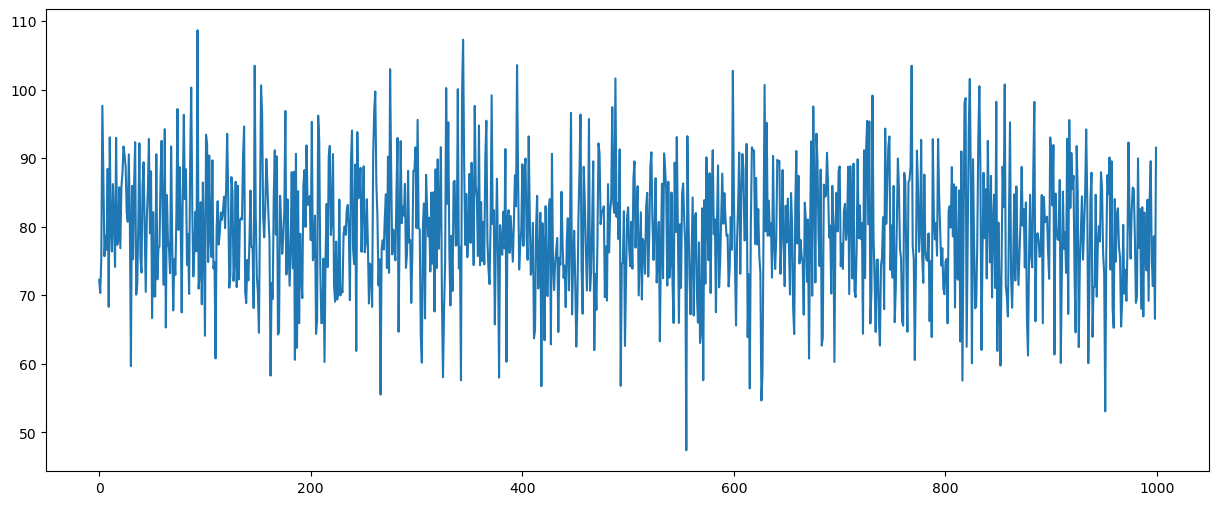

In [15]:
Gross_Profit = rev + COGS
Gross_Profit

plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)

In [16]:
max(Gross_Profit)

108.6447391799986

In [17]:
min(Gross_Profit)

47.394975802126886

In [18]:
Gross_Profit.mean()

79.36961134849894

In [19]:
Gross_Profit.std()

9.187754612804657

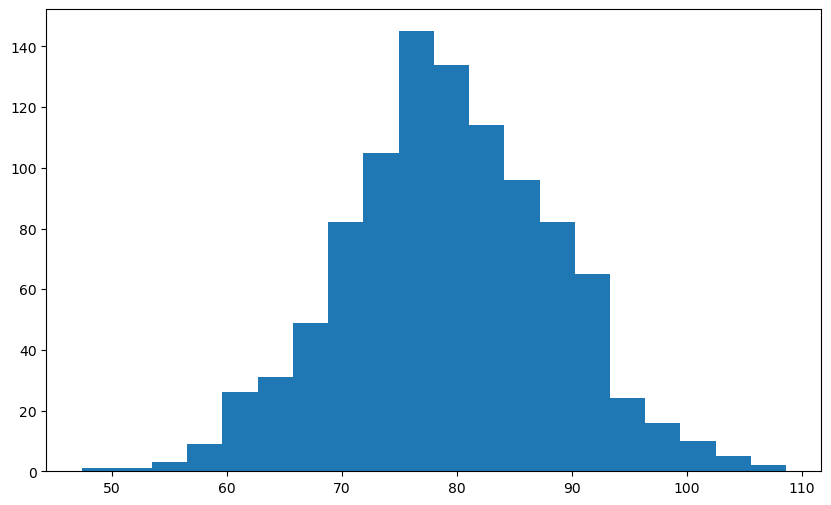

In [21]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = 20);

In [23]:
import pandas as pd
from scipy.stats import norm
%matplotlib inline

In [25]:
data = pd.read_csv('/Users/adamberger/Desktop/PG.csv', index_col = 'Date')
data

,PG
Date,
2007-01-03,46.849339
2007-01-04,46.493664
2007-01-05,46.094406
2007-01-08,46.196045
2007-01-09,46.079914
...,...
2017-04-04,88.532204
2017-04-05,88.591278
2017-04-06,88.030014


In [26]:
log_returns  = np.log(1 + data.pct_change())

In [27]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


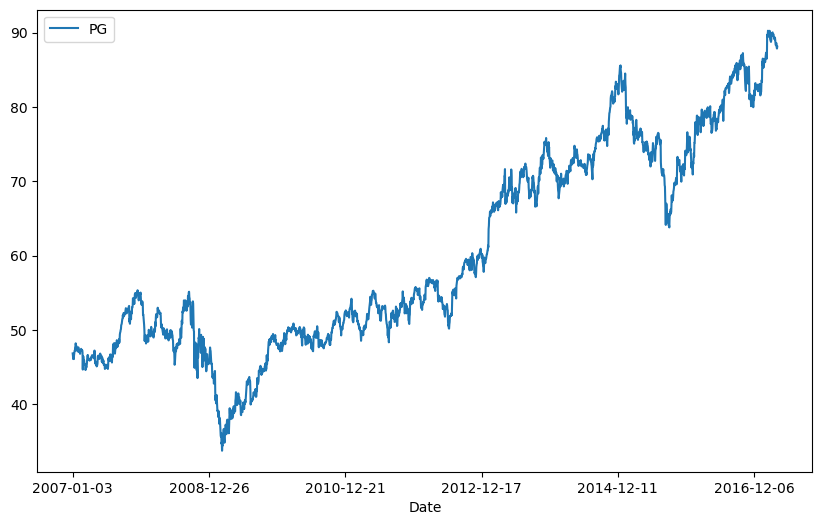

In [28]:
data.plot(figsize=(10,6));

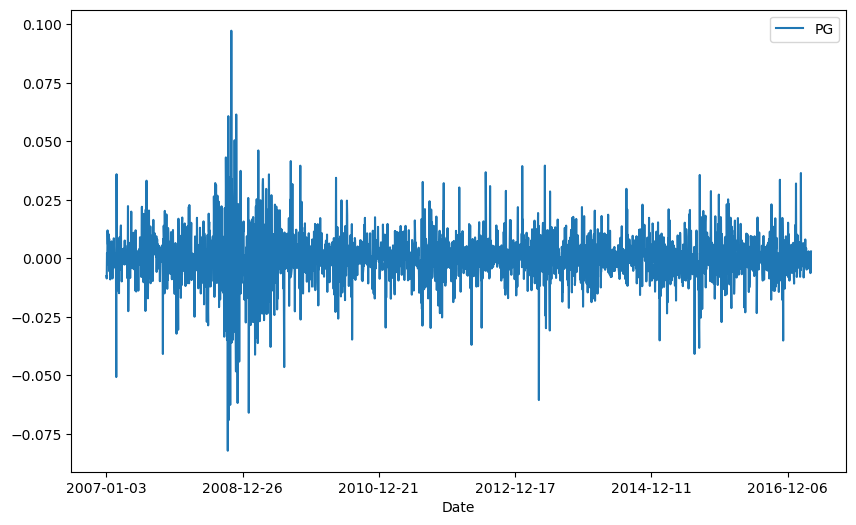

In [30]:
log_returns.plot(figsize = (10,6));

In [32]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [33]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [34]:
drift = u -(0.5 * var)
drift

PG    0.000182
dtype: float64

In [35]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

In [36]:
type(drift)

pandas.core.series.Series

In [37]:
type(stdev)

pandas.core.series.Series

In [38]:
np.array(drift)

array([0.00018236])

In [39]:
drift.values

array([0.00018236])

In [40]:
stdev.values

array([0.0111381])

In [41]:
norm.ppf(0.95)

1.6448536269514722

In [43]:
x = np.random.rand(10, 2)
x

array([[0.31777231, 0.0456342 ],
       [0.4897595 , 0.49785788],
       [0.52132158, 0.25059504],
       [0.98812071, 0.2248964 ],
       [0.27630102, 0.93704398],
       [0.40714181, 0.81393012],
       [0.89031325, 0.39104681],
       [0.30858818, 0.80537747],
       [0.83601823, 0.15032702],
       [0.89072343, 0.25603717]])

In [44]:
norm.ppf(x)

array([[-0.47393731, -1.68874451],
       [-0.02567196, -0.00536951],
       [ 0.05347073, -0.67261841],
       [ 2.26101102, -0.7557605 ],
       [-0.59386555,  1.53042307],
       [-0.23490352,  0.89247245],
       [ 1.22819573, -0.27659171],
       [-0.49985616,  0.86098725],
       [ 0.97822401, -1.03503186],
       [ 1.23038452, -0.65561118]])

In [45]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.21839787, -0.12097311],
       [-0.08160023, -1.2810835 ],
       [-0.63084026, -1.69980749],
       [ 0.23565863, -0.03513318],
       [-0.46995254,  0.14052157],
       [ 0.71596985, -0.92575512],
       [-0.90108839, -1.6039428 ],
       [-0.06905225, -0.28231921],
       [ 0.39734898,  0.56234862],
       [ 0.64243789,  0.15494461]])

In [47]:
t_intervals = 1000
iterations = 10

In [50]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [51]:
daily_returns

array([[0.99961582, 1.00031856, 1.00804883, ..., 1.00472478, 0.97484176,
        1.00484543],
       [0.99499333, 0.99695689, 0.98276923, ..., 0.99115049, 1.00813974,
        1.00769389],
       [0.99835734, 0.99434414, 1.01200046, ..., 0.99591411, 0.98925601,
        1.01835836],
       ...,
       [0.97940719, 1.0065422 , 0.99544439, ..., 0.97762725, 0.98895139,
        0.9871186 ],
       [1.00252123, 0.99349393, 1.00309377, ..., 0.98985263, 0.98913292,
        0.98117683],
       [0.98722636, 0.99658042, 0.98082952, ..., 0.98961728, 0.98096491,
        0.98776194]])

In [52]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [53]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [55]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [56]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 87.67744775,  87.85047469,  86.60027748, ...,  87.33882254,
         88.83589165,  88.79660391],
       [ 87.53342341,  87.35360435,  87.63952089, ...,  86.98196612,
         87.88143999,  90.42676399],
       ...,
       [ 53.81530671, 120.37226872, 138.02709906, ...,  69.50371838,
        216.21183119, 114.46136441],
       [ 53.95098759, 119.58911822, 138.4541237 , ...,  68.79843838,
        213.86223972, 112.3068388 ],
       [ 53.26183723, 119.18017359, 135.79989238, ...,  68.08412374,
        209.79135329, 110.93242069]])

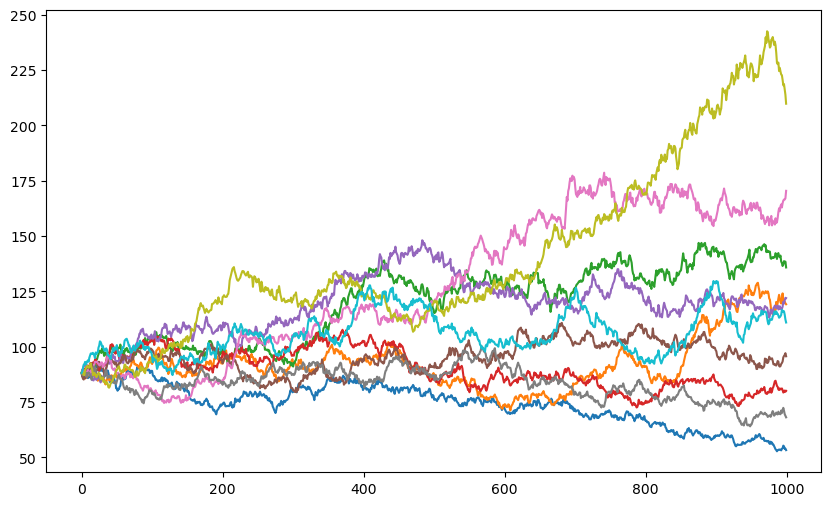

In [57]:
plt.figure(figsize=(10,6))
plt.plot(price_list);